
###### Trabalho 2.1 : Matriz de rigidez e Matriz de massa de uma treliça plana 
 Aluno: Daniel Barbosa Mapurunga Matos
 Matrícula: 00312265

In [1]:
#Importando as bibliotecas necessárias 

import numpy as np
import matplotlib.pyplot as plt


## 1. Introdução 

Este trabalho tem como intuito a confecção das matrizes de rigidez e massa de uma treliça plana, com 11 nós livres, modelada no FTool, como apresentado abaixo:

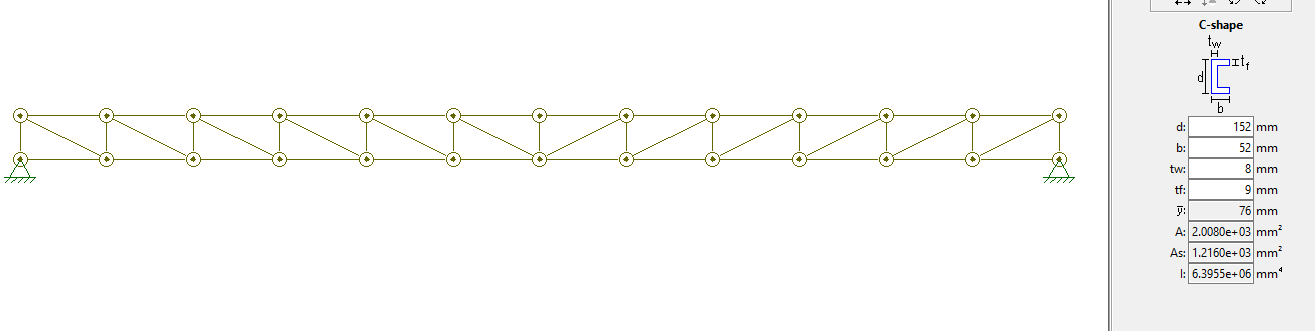

A treliça possui 24 metros, e está discretizada em 12 barras de 2 metros de comprimento. As barras possuem seção transversal "U" de 6 polegadas e suas dimensões foram retiradas do catálogo de perfis da GERDAU.



## 2. Matriz de rigidez

Para montar a matriz de rigidez, deve-se montar primeiro a matriz de flexibilidade H. Esta será montada a partir de sucessivos carregamentos unitários aplicados em cada nó livre da treliça, onde os deslocamentos aplicados a cada carregamento corresponderam a uma coluna da matriz de flexibilidade. Como são 11 nós livres, a matriz de flexibilidade será da ordem 11.


In [2]:
#Matriz de flexibilidade em m/N
H1 = np.array([[0.1252, 0.1911, 0.2327, 0.2533, 0.2560, 0.2444, 0.2133, 0.1739, 0.1297, 0.08382, 0.03058 ], 
               [0.1911, 0.3624, 0.4539, 0.5017, 0.5122, 0.4924, 0.4337, 0.3567, 0.2685, 0.17530, 0.08380 ], 
               [0.2327, 0.4539, 0.6362, 0.7210, 0.7474, 0.7258, 0.6459, 0.5363, 0.4072, 0.2685, 0.1297   ], 
               [0.2533, 0.5017, 0.721, 0.8852, 0.9388, 0.9252, 0.8339, 0.6997, 0.5303, 0.3567, 0.1739     ],
               [0.256, 0.5122, 0.7474, 0.9388, 1.064, 1.071, 0.9814, 0.8339, 0.6459, 0.4337, 0.2133      ],
               [0.2444, 0.4924, 0.7258, 0.9252, 1.071, 1.146, 1.071, 0.9252, 0.7258, 0.4924, 0.2444      ],
               [0.2133, 0.4337, 0.6459, 0.8339, 0.9814, 1.071, 1.064, 0.9388, 0.7474, 0.5122, 0.256      ],
               [0.1739, 0.3567, 0.5363, 0.6997, 0.8339, 0.9252, 0.9388, 0.8852, 0.721, 0.5017, 0.2533    ],
               [0.1297, 0.2685, 0.4072, 0.5303, 0.6459, 0.7258, 0.7474, 0.721, 0.6362, 0.4539, 0.2327    ],
               [0.08382, 0.1753, 0.2685, 0.3567, 0.4337, 0.4924, 0.5122, 0.5017, 0.4539, 0.3624, 0.1911  ],
               [0.03058, 0.0838, 0.1297, 0.1739, 0.2133, 0.2444, 0.256, 0.2533, 0.2327, 0.1911, 0.1252   ]])*1e-6   




Sabendo que a matriz de flexibilidade é igual ao inverso da matriz de rigidez, pode-se dizer que:

$$\mathbf{H}^{-1} = \mathbf{K}$$






In [3]:
# Matriz de rigidez em  N/m
K1 = np.linalg.inv(H1) 



## 3. Matriz de massa concentrada

A matriz de massa concentrada consiste em uma boa aproximação da matriz de massa consistente, sendo bastante simples de ser construida. Esta matriz consiste em uma matriz diagonal, onde os termos são calculados a partir da área de influência dos nós da estrutura. Os outros termos, relacionados a rotação, podem ser anulados pois não causarão uma diferença relevante ao problema.

Foi estimado o valor de 1500 Kg/m para a massa distribuida das barras. Como a área de influência de cada nó contempla 2 metros de barra, o valor associado por nó é de 3000kg.


In [4]:
# Lumped mass matrix in kg
M1 = np.array([[3,  0,  0,  0,  0, 0, 0, 0, 0, 0, 0], 
               [0,  3,  0,  0,  0, 0, 0, 0, 0, 0, 0], 
               [0,  0,  3,  0,  0, 0, 0, 0, 0, 0, 0], 
               [0,  0,  0,  3,  0, 0, 0, 0, 0, 0, 0], 
               [0,  0,  0,  0,  3, 0, 0, 0, 0, 0, 0], 
               [0,  0,  0,  0,  0, 3, 0, 0, 0, 0, 0], 
               [0,  0,  0,  0,  0, 0, 3, 0, 0, 0, 0], 
               [0,  0,  0,  0,  0, 0, 0, 3, 0, 0, 0], 
               [0,  0,  0,  0,  0, 0, 0, 0, 3, 0, 0], 
               [0,  0,  0,  0,  0, 0, 0, 0, 0, 3, 0], 
               [0,  0,  0,  0,  0, 0, 0, 0, 0, 0, 3]])*1e3 


## 3. Considerações finais

De posse das matrizes de rigidez e de flexibilidade, é possível resolver problemas de autovalores e autovetores, que correspondem, respectivamente, as frequências naturais de vibração e os modos de vibração da estrutura.

In [5]:
import pickle as pk

with open ('data/sample_KM.pk', 'wb') as target:
    pk.dump((K1, M1), target)